<img src="https://i.imgur.com/lQJojh4.png"/>

## Análise de Eficiência e Satisfação do Atendimento ao Cliente em Supermercados  🛍️

### Neste projeto, a rede de supermercados busca aprimorar a qualidade do atendimento ao cliente em suas lojas, focando em entender as interações entre os clientes e os funcionários, bem como identificar áreas de melhoria para oferecer uma experiência excepcional aos clientes.

### Problema de Negócio:

A rede de supermercados enfrenta o desafio de melhorar a experiência do cliente em suas lojas, incluindo a eficiência no atendimento, a satisfação do cliente e a identificação de gargalos que possam afetar negativamente a experiência.

### Visão de Negócio:

- **Monitoramento do Atendimento ao Cliente**: A implementação de sensores estrategicamente posicionados nas lojas permitirá rastrear a movimentação dos clientes, medindo o tempo de espera nas filas e analisando o fluxo de tráfego.
- **Feedback em Tempo Real**: Terminais de feedback estarão disponíveis em pontos-chave das lojas, permitindo que os clientes avaliem o atendimento que receberam instantaneamente, fornecendo informações valiosas em tempo real.
- **Análise de Interações**: A análise detalhada das interações entre funcionários e clientes será conduzida, incluindo a qualidade das saudações, a assistência fornecida e a eficácia na resolução de dúvidas ou problemas.
- **Avaliação do Tempo de Espera**: Será medido o tempo que os clientes passam nas filas de pagamento, permitindo uma avaliação objetiva se os tempos de espera estão dentro dos padrões aceitáveis.
- **Análise de Satisfação por Setor**: A satisfação dos clientes será avaliada em diferentes setores da loja, como o atendimento no caixa, o setor de frutas e verduras e outros, para identificar pontos fortes e áreas que precisam de melhorias.

### Benefícios Esperados:

- **Melhoria da Experiência do Cliente**: Com a identificação de gargalos e áreas de espera longa, a rede de supermercados será capaz de melhorar a experiência geral do cliente, aumentando a satisfação.
- **Treinamento de Funcionários**: As análises detalhadas das interações permitirão fornecer treinamento específico para os funcionários, aprimorando suas habilidades de atendimento.
- **Redução de Tempo de Espera**: Com base na avaliação dos tempos de espera, será possível otimizar o planejamento de pessoal para reduzir filas e tempos de espera excessivos.
- **Monitoramento da Satisfação ao Longo do Tempo**: Acompanhar as mudanças na satisfação do cliente ao longo do tempo permitirá avaliar a eficácia das melhorias implementadas e identificar tendências.
- **Tomada de Decisões Orientada por Dados**: As decisões relacionadas ao atendimento ao cliente serão fundamentadas em dados concretos, proporcionando uma abordagem mais estratégica e eficaz.

### Impacto:

Este projeto permitirá que a rede de supermercados compreenda melhor as interações entre clientes e funcionários, identificando oportunidades de aprimoramento no atendimento. Aumentando a satisfação do cliente e melhorando a eficiência, a empresa poderá criar uma experiência mais positiva para seus clientes, promovendo a fidelização e o sucesso a longo prazo

### dicionário de dados: 

| Coluna       | Tipo de Dado  | Descrição                                       |
|--------------|---------------|-------------------------------------------------|
| cpf          | String (CPF)  | CPF do cliente que realizou a compra            |
| hora         | String        | Hora da venda no formato HH:MM                 |
| data         | Data          | Data da venda no formato DD/MM/YYYY            |
| produto      | String        | Nome do produto vendido                        |
| preço        | Float         | Preço unitário do produto                      |
| quantidade   | Inteiro       | Quantidade de unidades vendidas do produto     |
| pdv          | Inteiro       | Ponto de venda (número)                        |
| operadora    | String        | Nome da operadora de pagamento                 |
| operação     | String        | Tipo de operação de pagamento (ex: pix)        |
| total        | Float         | Valor total da venda                           |
| satisfação   | Float         | Nível de satisfação do cliente (simulação)     |

### importando bibliotecas:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Importação e Visualização Inicial:

In [4]:
# carregando os dados brutos
df = pd.read_csv("../data/raw/venda_07-2023.csv")

In [5]:
# salvando os dados para trabalhar preservando os dados brutos
df.to_csv('../data/interim/venda.csv', index=False)

In [6]:
# Carregando os dados de trabalho
df = pd.read_csv("../data/interim/venda.csv")

### 2. Análise Exploratória:

Tendência de Vendas: A distribuição das vendas ao longo do tempo pode ajudar a identificar padrões sazonais e flutuações nas vendas.

In [7]:
# Converter a coluna 'data' para formato de data
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

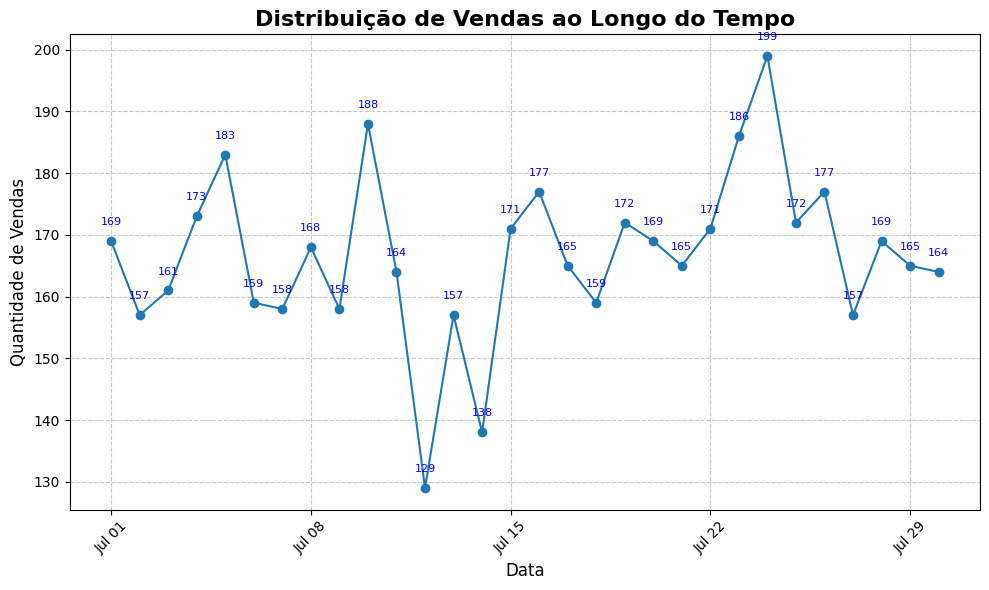

In [17]:
import matplotlib.dates as mdates
from datetime import datetime
# Agrupar os dados por data e calcular a quantidade de vendas em cada dia
vendas_por_data = df.groupby('data').size().reset_index(name='quantidade_vendas')
# Converter a coluna 'data' para o formato de data
vendas_por_data['data'] = pd.to_datetime(vendas_por_data['data'])
plt.figure(figsize=(10, 6))
plt.plot(vendas_por_data['data'], vendas_por_data['quantidade_vendas'], marker='o')
# Configurar formatação da data no eixo x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.title('Distribuição de Vendas ao Longo do Tempo', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # Adicionar grade ao gráfico com estilo sutil
plt.tight_layout()
# Adicionar os números aos marcadores
for i, row in vendas_por_data.iterrows():
    plt.annotate(str(row['quantidade_vendas']), 
                 xy=(row['data'], row['quantidade_vendas']), 
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom', 
                 fontsize=8, 
                 color='blue')
plt.show()

### 2.2. Produtos Mais Vendidos:

Produtos Mais Populares: A análise dos produtos mais vendidos ajuda a entender quais itens têm maior demanda entre os clientes.

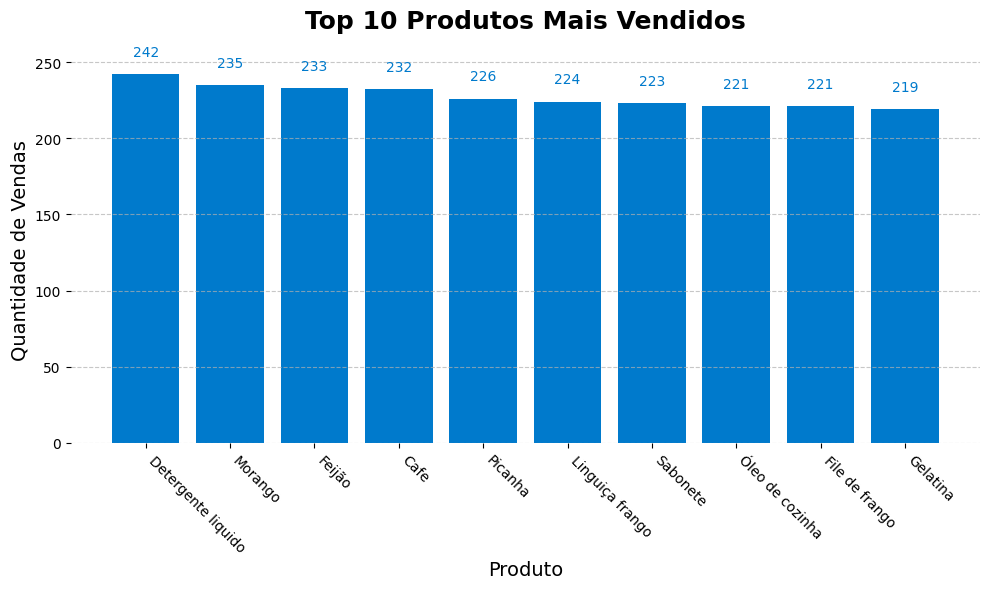

In [28]:
# Produtos mais vendidos
top_products = df['produto'].value_counts().head(10).reset_index()
top_products.columns = ['produto', 'quantidade_vendas']
plt.figure(figsize=(10, 6))
# Define a cor de tom de azul
blue_color = '#007acc'
# Plotar as barras
bars = plt.bar(top_products['produto'], top_products['quantidade_vendas'], color=blue_color)
plt.title('Top 10 Produtos Mais Vendidos', fontsize=18, fontweight='bold', pad=20)  # Adiciona espaçamento ao título
plt.xlabel('Produto', fontsize=14)
plt.ylabel('Quantidade de Vendas', fontsize=14)
plt.xticks(rotation=-45, ha='left')
# Adicionar os números acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval),
             ha='center', va='bottom', color=blue_color, fontsize=10)
# Remover bordas do gráfico
plt.box(False)
# Estilizar eixos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('lightgray')
plt.gca().spines['left'].set_color('lightgray')
# Remover eixo superior e direito
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
# Adicionar linhas de grade
plt.gca().grid(axis='y', linestyle='--', alpha=0.7)
# Ajustar o layout
plt.tight_layout()
plt.show()

### 2.3. Distribuição do Valor Total das Vendas:

Distribuição do Valor das Vendas: A maioria das vendas parece estar concentrada em faixas de valores relativamente baixos.

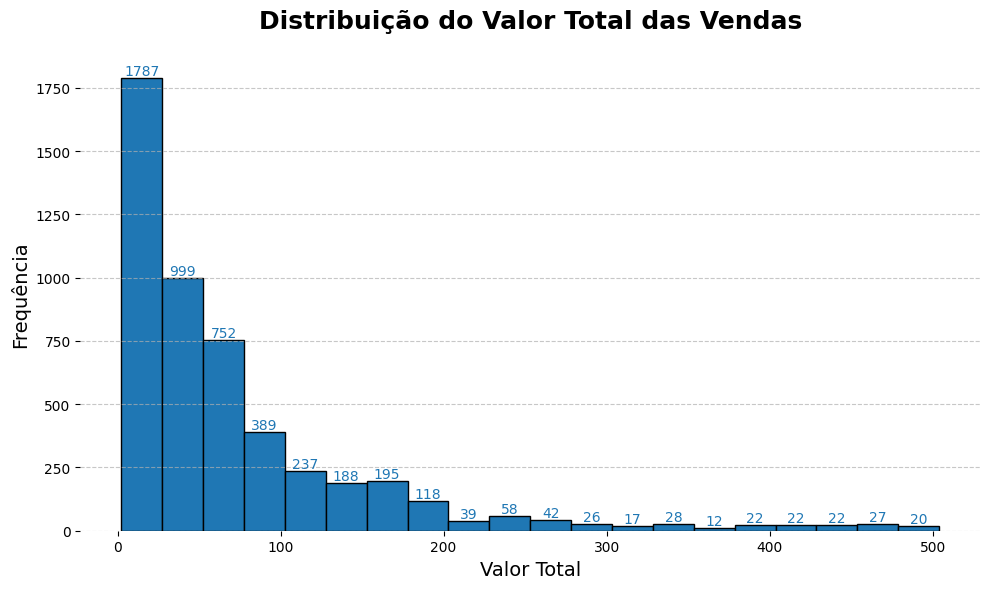

In [30]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['total'], bins=20, edgecolor='black', color='#1f77b4')  # Usar o tom de azul correto
plt.title('Distribuição do Valor Total das Vendas', fontsize=18, fontweight='bold', pad=20)  # Adicionar espaçamento ao título
plt.xlabel('Valor Total', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
# Adicionar os números acima das barras
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height(),
             f'{int(n[i])}', ha='center', va='bottom', color='#1f77b4', fontsize=10)  # Usar o tom de azul correto
# Remover bordas do gráfico
plt.box(False)
# Estilizar eixos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('lightgray')
plt.gca().spines['left'].set_color('lightgray')
# Remover eixo superior e direito
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
# Adicionar linhas de grade
plt.gca().grid(axis='y', linestyle='--', alpha=0.7)
# Ajustar o layout
plt.tight_layout()
plt.show()

### 2.4. Análise das Operações de Pagamento:

Preferências de Pagamento: A distribuição das operações de pagamento indica quais métodos são mais populares entre os clientes.

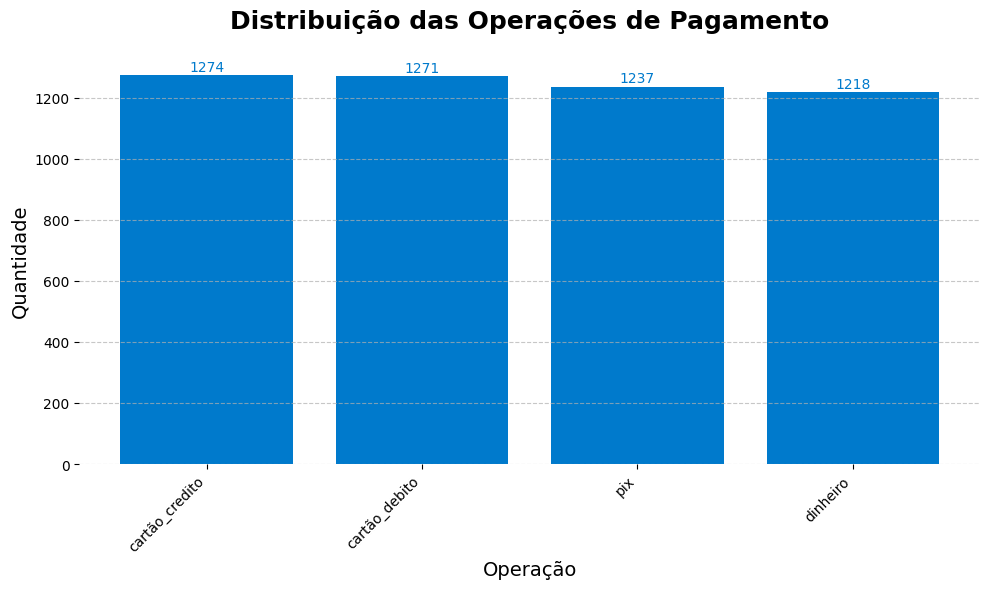

In [31]:
plt.figure(figsize=(10, 6))
payment_operations = df['operação'].value_counts().reset_index()
payment_operations.columns = ['operação', 'quantidade']

# Define a cor de tom de azul
blue_color = '#007acc'

# Plotar as barras
bars = plt.bar(payment_operations['operação'], payment_operations['quantidade'], color=blue_color)
plt.title('Distribuição das Operações de Pagamento', fontsize=18, fontweight='bold', pad=20)  # Adicionar espaçamento ao título
plt.xlabel('Operação', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.xticks(rotation=45, ha='right')
# Adicionar os números acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval),
             ha='center', va='bottom', color=blue_color, fontsize=10)

# Remover bordas do gráfico
plt.box(False)
# Estilizar eixos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('lightgray')
plt.gca().spines['left'].set_color('lightgray')
# Remover eixo superior e direito
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
# Adicionar linhas de grade
plt.gca().grid(axis='y', linestyle='--', alpha=0.7)
# Ajustar o layout
plt.tight_layout()
plt.show()


### 2.5. Análise da Satisfação por Operadora:

Satisfação por Operadora: É possível observar as operadoras que têm uma satisfação média mais alta entre os clientes, o que pode indicar um melhor desempenho no atendimento.

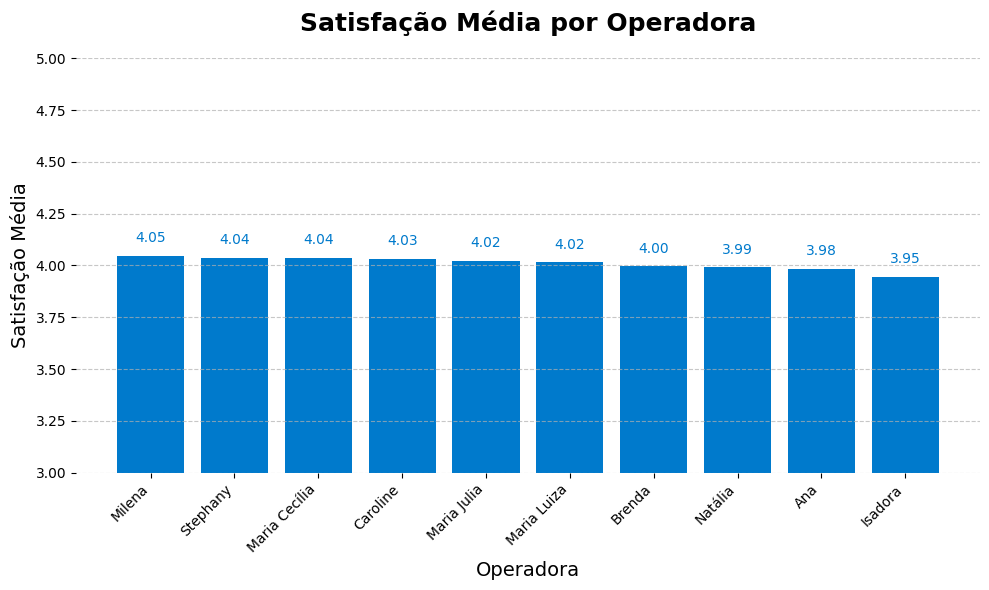

In [32]:
import random

plt.figure(figsize=(10, 6))

# Gerar dados fictícios de satisfação para cada operadora
df['satisfação'] = [random.uniform(3, 5) for _ in range(len(df))]
# Analisar a satisfação média por operadora
avg_satisfaction = df.groupby('operadora')['satisfação'].mean().sort_values(ascending=False).reset_index()

# Define a cor de tom de azul
blue_color = '#007acc'

# Plotar as barras
bars = plt.bar(avg_satisfaction['operadora'], avg_satisfaction['satisfação'], color=blue_color)
plt.title('Satisfação Média por Operadora', fontsize=18, fontweight='bold', pad=20)  # Adicionar espaçamento ao título
plt.xlabel('Operadora', fontsize=14)
plt.ylabel('Satisfação Média', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(3, 5)  # Definir o intervalo do eixo y

# Adicionar os números acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.2f}',
             ha='center', va='bottom', color=blue_color, fontsize=10)
# Remover bordas do gráfico
plt.box(False)
# Estilizar eixos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('lightgray')
plt.gca().spines['left'].set_color('lightgray')
# Remover eixo superior e direito
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
# Adicionar linhas de grade
plt.gca().grid(axis='y', linestyle='--', alpha=0.7)
# Ajustar o layout
plt.tight_layout()
plt.show()


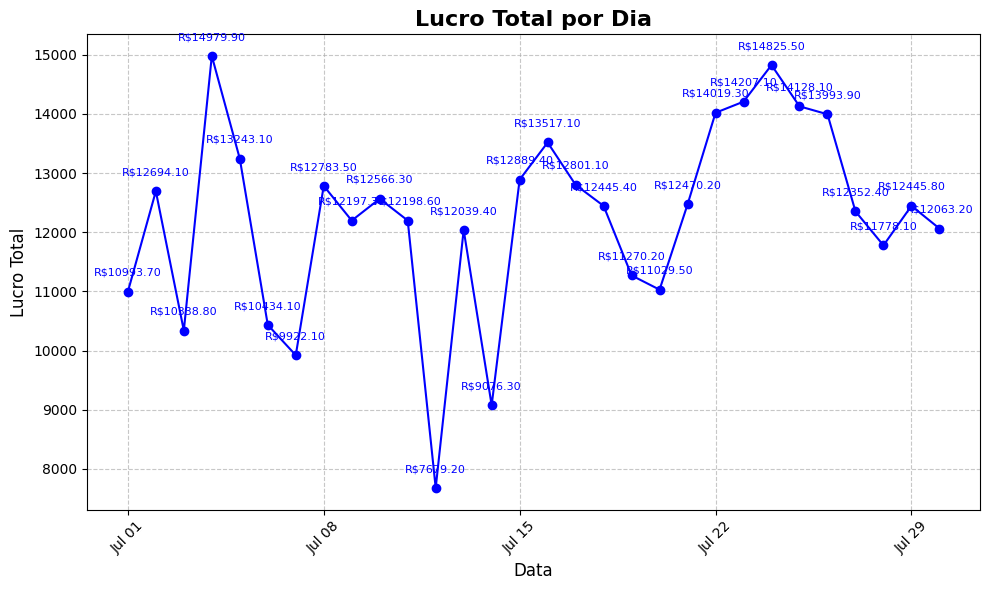

In [34]:
import matplotlib.dates as mdates
# Agrupar os dados por data e calcular o lucro total em cada dia
lucro_por_data = df.groupby('data')['total'].sum().reset_index()
# Converter a coluna 'data' para o formato de data
lucro_por_data['data'] = pd.to_datetime(lucro_por_data['data'])
plt.figure(figsize=(10, 6))
plt.plot(lucro_por_data['data'], lucro_por_data['total'], marker='o', color='blue')  # Usar a cor azul para representar o lucro
# Configurar formatação da data no eixo x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.title('Lucro Total por Dia', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Lucro Total', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # Adicionar grade ao gráfico com estilo sutil
plt.tight_layout()
# Adicionar os números aos marcadores
for i, row in lucro_por_data.iterrows():
    plt.annotate(f'R${row["total"]:.2f}', 
                 xy=(row['data'], row['total']), 
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom', 
                 fontsize=8, 
                 color='blue')
plt.show()


#### Lucro do mês 367.382,70 R$

In [37]:
df['total'].sum()

367382.7

## Analisando dia de vendas baixas:

#### Ocorreu no dia 12/07/23

In [17]:
# Agrupar os dados por data e calcular a quantidade de vendas em cada dia
vendas_por_data = df.groupby('data').size().reset_index(name='quantidade_vendas')
# Filtrar os dias em que ocorreram exatamente 129 vendas
dias_com_129_vendas = vendas_por_data[vendas_por_data['quantidade_vendas'] == 129]
# Mostrar os dias em que ocorreram exatamente 129 vendas
print(dias_com_129_vendas)

         data  quantidade_vendas
11 2023-07-12                129


#### Isolando todas as ocorrencias deste dia 

In [20]:
data_selecionada = "2023-07-12"
df_vendas_baixas = df[df['data'] == data_selecionada]
df_vendas_baixas.head()

,cpf,hora,data,produto,preço,quantidade,pdv,operadora,operação,total
2,384.071.659-48,21:56,2023-07-12,File de frango,19.2,7,12,Natália,dinheiro,134.4
52,738.596.420-65,20:16,2023-07-12,Sal,2.3,4,17,Caroline,dinheiro,9.2
125,263.179.804-03,08:22,2023-07-12,Açúcar,25.5,3,11,Natália,cartão_credito,76.5
136,254.193.867-55,14:51,2023-07-12,Açúcar,25.5,2,19,Caroline,dinheiro,51.0
165,064.379.815-39,08:04,2023-07-12,Tomate,8.2,6,5,Maria Julia,dinheiro,49.2


#### O lucro total no dia 12/07 foi de 7679 R$

In [19]:
df_vendas_baixas['total'].sum()

7679.200000000001

#### 5 clientes fizeram compras recorrrentes

In [21]:
df_vendas_baixas['cpf'].value_counts()

cpf
468.307.129-04    5
846.732.951-37    5
207.651.839-86    4
715.408.269-02    4
593.641.287-37    3
                 ..
823.570.469-29    1
732.650.914-06    1
041.639.752-25    1
154.293.076-61    1
130.294.586-60    1
Name: count, Length: 71, dtype: int64

#### Sabonete,Gelatina,Detergente liquido,Refrigerante lata,Linguiça frango e Vinho foram os produtos mais vendidos             

In [23]:
df_vendas_baixas['produto'].value_counts()

produto
Sabonete              9
Gelatina              9
Detergente liquido    8
Refrigerante lata     8
Linguiça frango       7
Vinho                 7
Cafe                  7
Açúcar                6
Esponja de aço        6
Morango               6
Picanha               6
Escova dental         5
Cenoura               5
Farinha               5
Óleo de cozinha       5
Sal                   5
Ovos                  5
Alcatra               4
Feijão                4
Arroz                 4
Tomate                4
File de frango        4
Name: count, dtype: int64

#### Em media as vendas foram de 59 R$

In [24]:
df_vendas_baixas['total'].mean()

59.528682170542645

#### Em media os clientes levaram 5 produtos

In [25]:
df_vendas_baixas['quantidade'].mean()

5.124031007751938

#### o cpf 46830712904 gerou 263 R$ de lucro.

In [29]:
df_46830712904 = df_vendas_baixas[(df_vendas_baixas['data'] == '2023-07-12') & (df['cpf'] == '468.307.129-04')]
df_46830712904['total'].sum()

/tmp/ipykernel_43924/2787290366.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_46830712904 = df_vendas_baixas[(df_vendas_baixas['data'] == '2023-07-12') & (df['cpf'] == '468.307.129-04')]


263.4

In [30]:
df_vendas_baixas['hora'].value_counts()

hora
08:32    3
20:08    2
16:54    2
17:49    2
20:22    2
        ..
15:57    1
19:33    1
12:47    1
17:46    1
18:07    1
Name: count, Length: 120, dtype: int64